In [38]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns
from sklearn.datasets import make_classification

In [5]:
df = pd.read_excel('C:/Users/Playdata/고객 세그멘테이션/Online Retail.xlsx')

In [22]:
df_s = df.groupby('Country').get_group('Spain')

In [41]:
df_s

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6421,536944,22383,LUNCH BAG SUKI DESIGN,70,2010-12-03 12:20:00,1.65,12557.0,Spain
6422,536944,22384,LUNCH BAG PINK POLKADOT,100,2010-12-03 12:20:00,1.45,12557.0,Spain
6423,536944,20727,LUNCH BAG BLACK SKULL.,60,2010-12-03 12:20:00,1.65,12557.0,Spain
6424,536944,20725,LUNCH BAG RED RETROSPOT,70,2010-12-03 12:20:00,1.65,12557.0,Spain
6425,536944,20728,LUNCH BAG CARS BLUE,100,2010-12-03 12:20:00,1.45,12557.0,Spain
...,...,...,...,...,...,...,...,...
535271,581193,23291,DOLLY GIRL CHILDRENS CUP,2,2011-12-07 17:05:00,1.25,17097.0,Spain
535272,581193,85232D,SET/3 DECOUPAGE STACKING TINS,1,2011-12-07 17:05:00,4.95,17097.0,Spain
535273,581193,22721,SET OF 3 CAKE TINS SKETCHBOOK,2,2011-12-07 17:05:00,1.95,17097.0,Spain
535274,581193,23241,TREASURE TIN GYMKHANA DESIGN,1,2011-12-07 17:05:00,2.08,17097.0,Spain


In [78]:
drop_index = df_s[df_s.Quantity < 0].index

In [81]:
df_s.drop(drop_index, axis = 0, inplace = True)

In [82]:
df_s[df_s.Quantity < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [94]:
result = df_s.groupby('CustomerID').head()

In [96]:
result = result.set_index('CustomerID')

In [105]:
result.drop(['Description', 'Country'], axis = 1, inplace = True)

In [108]:
result.groupby('InvoiceNo').head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice
CustomerID,,,,,
12557.0,536944,22383,70,2010-12-03 12:20:00,1.65
12557.0,536944,22384,100,2010-12-03 12:20:00,1.45
12557.0,536944,20727,60,2010-12-03 12:20:00,1.65
12557.0,536944,20725,70,2010-12-03 12:20:00,1.65
12557.0,536944,20728,100,2010-12-03 12:20:00,1.45
...,...,...,...,...,...
12442.0,580955,21974,12,2011-12-06 14:22:00,1.45
12442.0,580955,23597,6,2011-12-06 14:22:00,2.95
12442.0,580955,22090,6,2011-12-06 14:22:00,2.95


In [118]:
result = result.reset_index()

In [125]:
temp = result.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
products_per_basket = temp.rename(columns = {'InvoiceNo':'Number of products'})
top_baskets = products_per_basket.sort_values('Number of products', ascending=False)
top_baskets

,CustomerID,Number of products
0,12354.0,5
1,12417.0,5
28,12597.0,5
27,12596.0,5
26,12557.0,5
25,12556.0,5
24,12551.0,5
23,12550.0,5
22,12548.0,5
21,12547.0,5


In [126]:
t_amount = result['Quantity'] * result['UnitPrice']
result['Total_amount'] = t_amount
result

,CustomerID,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Total_amount
0,12557.0,536944,22383,70,2010-12-03 12:20:00,1.65,115.50
1,12557.0,536944,22384,100,2010-12-03 12:20:00,1.45,145.00
2,12557.0,536944,20727,60,2010-12-03 12:20:00,1.65,99.00
3,12557.0,536944,20725,70,2010-12-03 12:20:00,1.65,115.50
4,12557.0,536944,20728,100,2010-12-03 12:20:00,1.45,145.00
...,...,...,...,...,...,...,...
144,12442.0,580955,21974,12,2011-12-06 14:22:00,1.45,17.40
145,12442.0,580955,23597,6,2011-12-06 14:22:00,2.95,17.70
146,12442.0,580955,22090,6,2011-12-06 14:22:00,2.95,17.70
147,12442.0,580955,21209,12,2011-12-06 14:22:00,0.39,4.68


In [184]:
aggregations = {'InvoiceDate' : 'max', 'InvoiceNo' : 'count', 'Quantity' : 'sum', 'Total_amount' : 'sum'}

cus_df = result.groupby('CustomerID').agg(aggregations)

cus_df = cus_df.reset_index()
cus_df

,CustomerID,InvoiceDate,InvoiceNo,Quantity,Total_amount
0,12354.0,2011-04-21 13:11:00,5,38,71.00
1,12417.0,2011-04-28 13:09:00,5,47,73.05
2,12421.0,2011-01-24 15:09:00,5,31,86.85
3,12442.0,2011-12-06 14:22:00,5,60,66.84
4,12445.0,2011-11-17 18:43:00,4,62,133.40
5,12448.0,2011-10-26 13:46:00,5,61,109.04
6,12450.0,2011-06-19 14:36:00,5,54,85.38
7,12454.0,2011-10-14 17:13:00,5,180,910.20
8,12455.0,2011-06-03 11:33:00,5,29,98.50
9,12462.0,2011-02-09 14:44:00,5,24,70.80


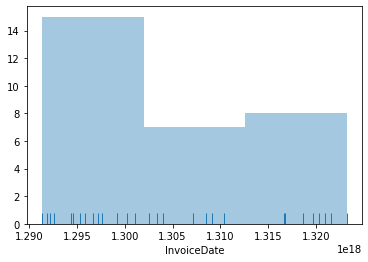

In [185]:
sns.distplot(cus_df['InvoiceDate'], kde=False, rug=True)

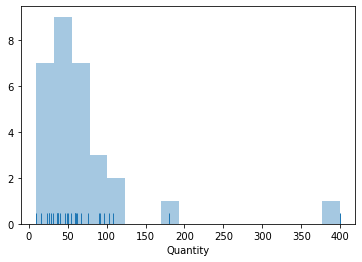

In [186]:
sns.distplot(cus_df['Quantity'], kde=False, rug=True)

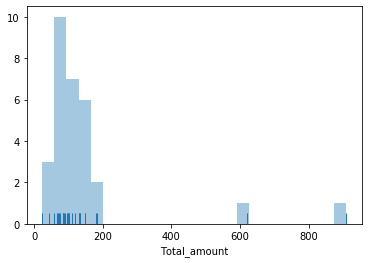

In [187]:
sns.distplot(cus_df['Total_amount'], kde=False, rug=True)

In [188]:
cus_df['Total_amount'] = np.log1p(cus_df['Total_amount'])
cus_df['Quantity'] = np.log1p(cus_df['Quantity'])

In [191]:
cus_df.describe()

,CustomerID,InvoiceNo,Quantity,Total_amount
count,30.000000,30.000000,30.000000,30.000000
mean,12658.100000,4.966667,3.969133,4.683070
std,840.392369,0.182574,0.707769,0.672311
min,12354.000000,4.000000,2.302585,3.180966
25%,12454.250000,5.000000,3.610918,4.353233
50%,12538.500000,5.000000,3.969579,4.595107
75%,12547.750000,5.000000,4.312731,4.892883
max,17097.000000,5.000000,5.993961,6.814762


In [192]:
cus_df['Grade'] = cus_df['Total_amount'].map(lambda x : 'Diamond' if x > 4.9 else('Gold' if x > 4.5 else 'Silver'))

In [195]:
cus_df

,CustomerID,InvoiceDate,InvoiceNo,Quantity,Total_amount,Grade
0,12354.0,3381,5,3.663562,4.276666,Silver
1,12417.0,3374,5,3.871201,4.304741,Silver
2,12421.0,3468,5,3.465736,4.475631,Silver
3,12442.0,3152,5,4.110874,4.217152,Silver
4,12445.0,3171,4,4.143135,4.900820,Diamond
5,12448.0,3193,5,4.127134,4.700844,Gold
6,12450.0,3322,5,4.007333,4.458756,Silver
7,12454.0,3205,5,5.198497,6.814762,Diamond
8,12455.0,3338,5,3.401197,4.600158,Gold
9,12462.0,3452,5,3.218876,4.273884,Silver


In [194]:
import datetime as dt

cus_df['InvoiceDate'] = dt.datetime(2020,7,23) - cus_df['InvoiceDate']
cus_df['InvoiceDate'] = cus_df['InvoiceDate'].apply(lambda x : x.days + 1)
print('cus_df 로우와 컬럼 건수는 ',cus_df.shape)

cus_df 로우와 컬럼 건수는  (30, 6)


In [24]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.datasets import make_circles
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [25]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [213]:
cus_df2 = cus_df
cus_df2['Grade'] = cus_df2['Total_amount'].map(lambda x : 2 if x > 6.0 else(1 if x > 4.5 else 0))

dbscan = DBSCAN(eps=100, min_samples=10, metric='euclidean') 
dbscan_labels = dbscan.fit_predict(cus_df2)

cus_df2['dbscan_cluster'] = dbscan_labels

cus_result = cus_df2.groupby(['Grade'])['dbscan_cluster'].value_counts()
print(cus_result)

Grade  dbscan_cluster
0      -1                10
        0                 2
1       0                 9
       -1                 7
2      -1                 1
        0                 1
Name: dbscan_cluster, dtype: int64


In [200]:
dbscan_labels

array([-1,  0,  0, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0, -1], dtype=int64)

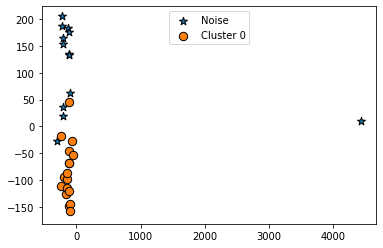

In [201]:
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(cus_df2)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
cus_df2['ftr1'] = pca_transformed[:,0]
cus_df2['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, cus_df2, 'dbscan_cluster', iscenter=False)

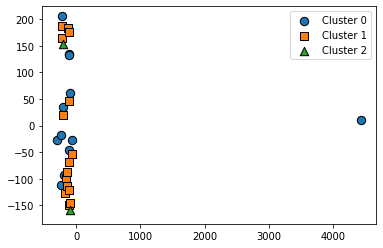

In [202]:
from sklearn.datasets import make_circles

clusterDF = pd.DataFrame(data=cus_df2, columns=['ftr1', 'ftr2'])
clusterDF['target'] = cus_df2['Grade']

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

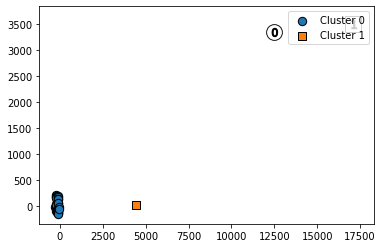

In [203]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(cus_df2)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)